SUPERVISED LEARNING : CLASSIFICATION

Models to explore --> Logistic Regression, Support Vector Machines,Random Forest, XGBoost.

Other Datasets => Mnist, Spam detection, Medical Diagnosis

In [260]:
import pandas as pd

In [261]:
df=pd.read_csv('/Users/deha/Desktop/python/Titanic-Dataset.csv')

In [262]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [264]:
df.dropna(subset=['Age'],inplace=True)

In [265]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [266]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
C91            1
C124           1
C32            1
E34            1
C148           1
Name: count, Length: 134, dtype: int64

In [267]:
df.drop(['Cabin'],axis=1,inplace=True)

In [268]:
df['Embarked'].value_counts()

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

In [269]:
df['Embarked']=df['Embarked'].fillna('N') # N-> not known

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


In [271]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [272]:
df['Pclass'].value_counts()

Pclass
3    355
1    186
2    173
Name: count, dtype: int64

In [273]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis=1,inplace=True)

In [274]:
#Col SibSp+parch can be combined for feature engineering also..

In [275]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [276]:
df['Sex']=df['Sex'].str.strip() #.str is added incase of series

In [277]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [278]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,S
1,1,1,1,38.0,71.2833,C
2,1,3,1,26.0,7.9250,S
3,1,1,1,35.0,53.1000,S
4,0,3,0,35.0,8.0500,S


In [279]:
df['Embarked']=df['Embarked'].apply(lambda x: 1 if x=='S' 
                                    else 2 if x=='C'
                                   else 3 if x=='Q'
                                   else 4)

In [280]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,2
2,1,3,1,26.0,7.9250,1
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,1


In [281]:
df['Fare']=df['Fare'].round(2)

In [282]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.25,1
1,1,1,1,38.0,71.28,2
2,1,3,1,26.0,7.92,1
3,1,1,1,35.0,53.10,1
4,0,3,0,35.0,8.05,1


In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

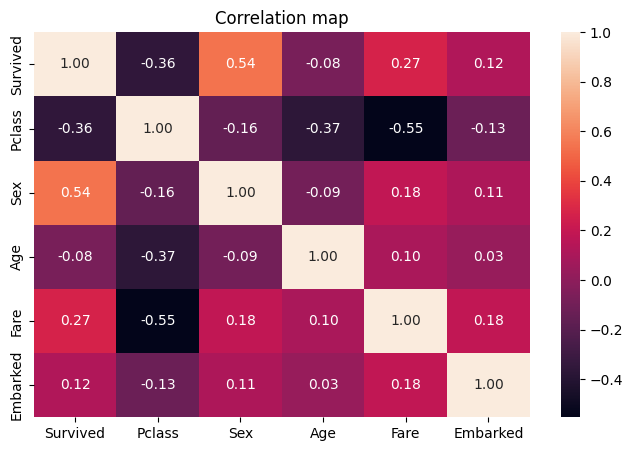

In [284]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.title("Correlation map")
plt.show()

#Sex,Fare and Embarked(slightly) are positively correlated

#Pclass and age(slightly) are negatively correlated

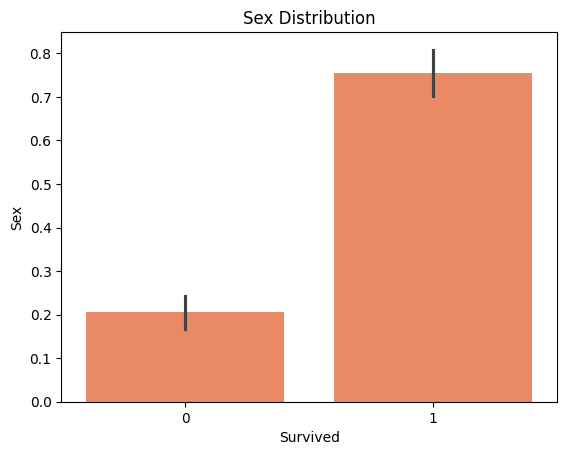

In [285]:
sns.barplot(x='Sex', y='Survived', data=df,color='coral')
plt.title('Sex Distribution')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()

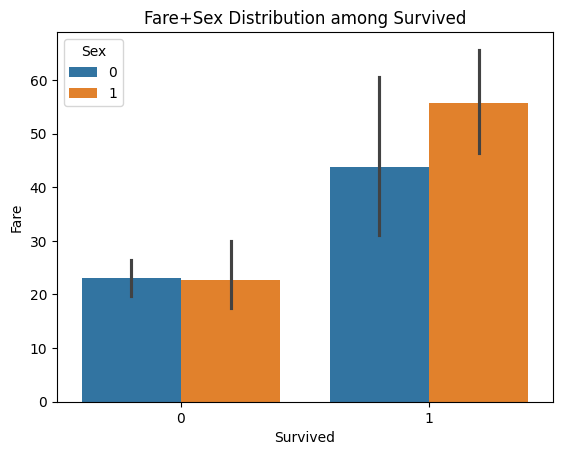

In [286]:
sns.barplot(x='Survived', y='Fare', hue='Sex',data=df)
plt.title('Fare+Sex Distribution among Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


In [287]:
age_data=df['Age'].value_counts()
age_data

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

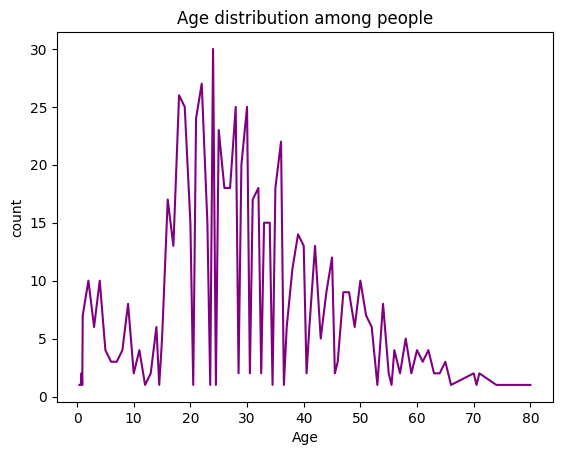

In [288]:
sns.lineplot(age_data,color='purple')
plt.title('Age distribution among people')
plt.show()

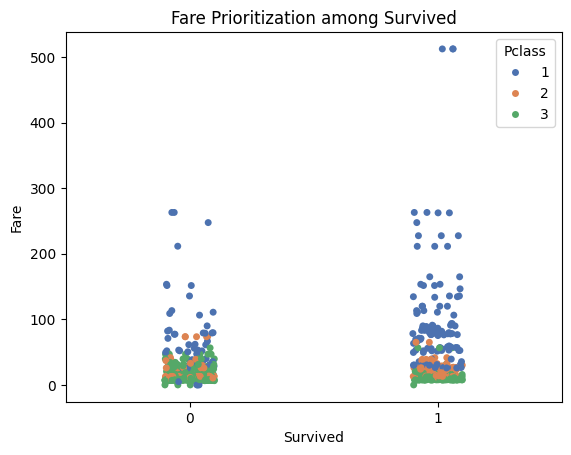

In [289]:
sns.stripplot(x='Survived',y='Fare',hue='Pclass',data=df,palette='deep')
plt.title('Fare Prioritization among Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

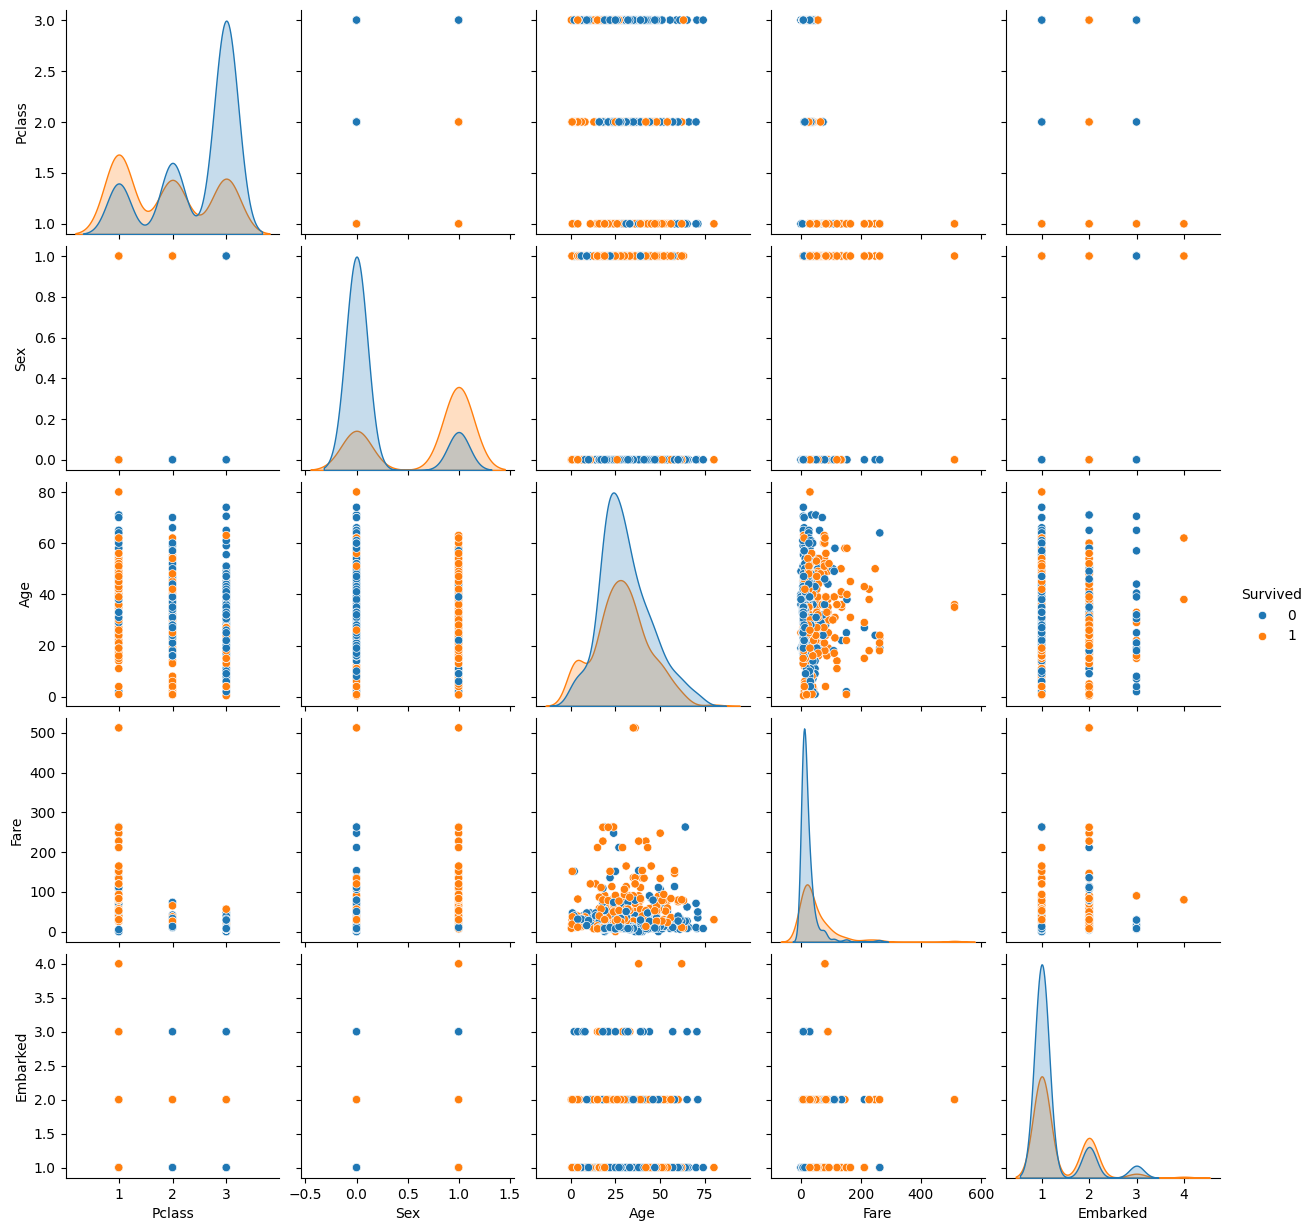

In [290]:
sns.pairplot(df, hue='Survived') 

In [291]:
from sklearn.decomposition import PCA

In [292]:
x=df.iloc[:,1:] 
y=df['Survived']     # df.loc[:,df.columns=='Survived']. (returns df)

In [293]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)  

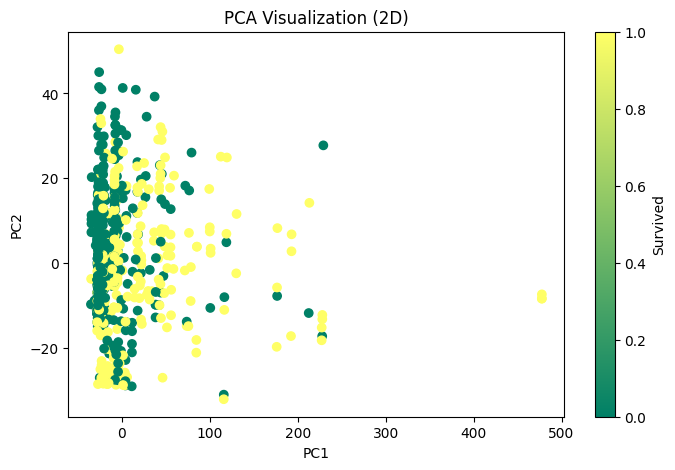

In [294]:
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1],cmap='summer',c=y)
plt.title('PCA Visualization (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Survived')
plt.show()

In [295]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.25,1
1,1,1,1,38.0,71.28,2
2,1,3,1,26.0,7.92,1
3,1,1,1,35.0,53.10,1
4,0,3,0,35.0,8.05,1


In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
scaler=StandardScaler()
x_sc=scaler.fit_transform(x)
x_sc_df=pd.DataFrame(x_sc,columns=x.columns)

In [298]:
x_sc_df.shape

(714, 5)

In [300]:
 y.shape

(714,)

In [301]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [315]:
x_train,x_test,y_train,y_test=train_test_split(x_sc_df,y,test_size=0.2,random_state=26)

In [303]:
from sklearn.metrics import accuracy_score,classification_report

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

In [305]:
models={
    "Logistic Regression":LogisticRegression(),
    "SVM":SVC(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(n_estimators=100)
}

In [316]:
for name,model in models.items():
    print(f"==================={name}====================")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print(f"Accuracy:{acc:.4f}")
    print(classification_report(y_test,y_pred))

===================Logistic Regression====================
Accuracy:0.8252
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        85
           1       0.79      0.78      0.78        58

    accuracy                           0.83       143
   macro avg       0.82      0.82      0.82       143
weighted avg       0.82      0.83      0.82       143

===================SVM====================
Accuracy:0.8322
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        85
           1       0.93      0.64      0.76        58

    accuracy                           0.83       143
   macro avg       0.86      0.80      0.81       143
weighted avg       0.85      0.83      0.82       143

===================Decision Tree====================
Accuracy:0.8252
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        85
           1       0.78      0.79 

In [322]:
param_grids={
    "Logistic Regression":{'C':[0.01,0.1,1.0,10.0]},
    "SVM":{'C':[0.1,1.0,10.0],'kernel':['linear','rbf']},
    "Decision Tree":{'max_depth':[3,5,10,None]},
    "Random Forest":{'n_estimators':[50,100],'max_depth':[3,5,10,None]}
}

In [324]:
#Using GridSearchCV
for name,model in models.items():
    grid=GridSearchCV(model,param_grids[name],cv=5,scoring='accuracy')
    grid.fit(x_train,y_train)
    best_model=grid.best_estimator_
    y_pred=best_model.predict(x_test)
    print(grid.best_params_)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

{'C': 1.0}
0.8251748251748252
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        85
           1       0.79      0.78      0.78        58

    accuracy                           0.83       143
   macro avg       0.82      0.82      0.82       143
weighted avg       0.82      0.83      0.82       143

{'C': 10.0, 'kernel': 'rbf'}
0.8041958041958042
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        85
           1       0.80      0.69      0.74        58

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143

{'max_depth': 3}
0.7832167832167832
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        85
           1       0.91      0.52      0.66        58

    accuracy                           0.78       143
   macro avg  

In [340]:
m=LogisticRegression()
m.fit(x_train,y_train)

LogisticRegression()

In [332]:
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve

In [355]:
def visualize_model(model,x_test,y_test):
    y_pred=model.predict(x_test)
    y_proba=model.predict_proba(x_test)[:,1] #for positive class 

    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    fpr,tpr,_=roc_curve(y_test,y_proba) # _ => thresholds
    auc=roc_auc_score(y_test,y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr,tpr,label=f"AUC:{auc:.2f}")
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('Roc Curve')
    plt.show()

    precision,recall,_=precision_recall_curve(y_test,y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(recall,precision,color='red')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

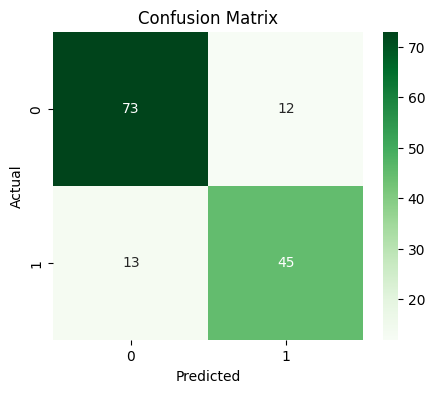

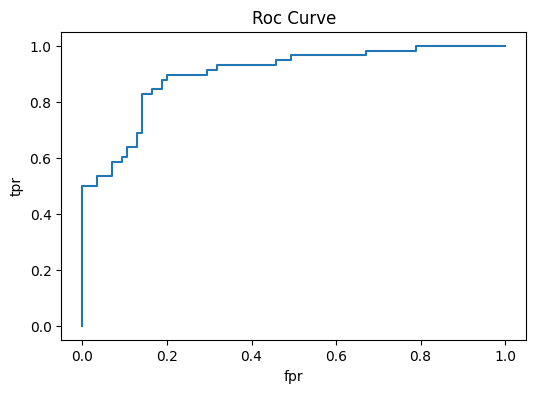

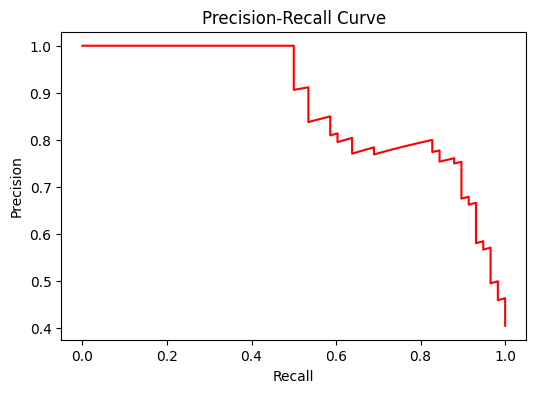

In [356]:
visualize_model(m,x_test,y_test)